**Credit Card Clients Default:**

**Project Description**

This project focuses on predicting customer default behavior using the Default of Credit Card Clients Dataset, originally sourced from the UCI Machine Learning Repository and hosted on Kaggle. The dataset contains financial and demographic information for credit card clients in Taiwan, spanning from April to September 2005. Key features include balance limits, bill amounts, payment history, and personal attributes such as age, education, and marital status.

**Goal/Objective:**

The objective is to build a supervised machine learning model to classify whether a customer is likely to default on their credit card payment. This is framed as a binary classification task, and multiple algorithms—including Logistic Regression, Random Forest, XGBoost, and Support Vector Classifier—were trained and evaluated.

The project pipeline includes the below steps:


Data cleaning and preprocessing
Exploratory data analysis (EDA)
Feature selection and scaling
Handling class imbalance
Model training, hyperparameter tuning, and performance benchmarking
Final model evaluation on a held-out test set

**Data Description:**

There are 25 features in this dataset.

1.   ID: ID of each client
1.   LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
2.   SEX: Gender (1=male, 2=female)
2.   EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
1.   MARRIAGE: Marital status (1=married, 2=single, 3=others)
2.   AGE: Age in years
1.   PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
1.   PAY_2: Repayment status in August, 2005 (scale same as above)
2.   PAY_3: Repayment status in July, 2005 (scale same as above)
1.   PAY_4: Repayment status in June, 2005 (scale same as above)
2.   PAY_5: Repayment status in May, 2005 (scale same as above)
1.   PAY_6: Repayment status in April, 2005 (scale same as above)
2.   BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
1.   BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
1.   BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
2.   BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)


1.   BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
1.   BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
2.   PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
2.   PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
1.   PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
1.   PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
1.   PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
2.   PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
2.default.payment.next.month: Default payment (1=yes, 0=no)
-**Target to predict: default.payment.next.month**

**Data Size:**

Number of records: 30000
Number of Features: 25
Data FileName: UCI_Credit_Card.csv (1 File - 2.86 MB)

**Data Type of Features:**

1.   Categorical Features - Education,Sex and Marriage (Since it has values like 0,1,2 etc, its mentioned as numerical feature)
2.   Numerical Features - PAY_AMT(1 to 6),BILL_AMT(1 to 6),PAY(0 to 6),LIMIT_BAL

**Data Source Citation**
**Acknowledgement and Citation:**

**UCI Machine Learning Repository:**

Yeh, I. (2009). Default of Credit Card Clients [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C55S3H.

**Kaggle Platform:**

The dataset was accessed from the Kaggle platform:

Default of Credit Card Clients Dataset. (n.d.). Www.kaggle.com. https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

**GitHub Link:**

The deliverables for the Supervised Learning final project can be found in the below link.

https://github.com/kmadhu181090/MS-AI/tree/main/Pathway%20Machine%20Learning%3A%20Theory%20%26%20Hands-On%20Practice%20with%20Python%20Specialization/CSCA%205622%3A%20Introduction%20to%20Machine%20Learning%3A%20Supervised%20Learning%20/Module%207%20-%20Final%20Project

# Project Steps:



1.   Project Description
1.   Data Loading and Data Inspection
1.   Data Cleaning and Preprocessing (Satge 1)
1.   Exploratory Data Analysis
1.   Data Cleaning and Preprocessing (Satge 2)
1.   Separate Features and Target
1.   Train/Test/Validation Split
1.   Feature Selection
1.   Feature Scaling
1.   Handle Class Imbalance
1.   Model Training and Evaluation
*   Logistic Regression
*   Random Forest Classifier
*   XGBOOST
*   SVC
12.   Model Performance Summary
2.   Implemeting the best model on Test Set
2.   Conclusion



In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import f1_score,roc_auc_score,confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


In [76]:
import pandas as pd
#filepath="content/sample_data/UCI_Credit_Card"
df = pd.read_csv("UCI_Credit_Card.csv")

# Data Loading and Data Inspection

In [77]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [78]:
df.shape

(30000, 25)

In [79]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


We can infer that Normalization has to be done since the values are in different scale.

# Data Cleaning and Preprocessing: (Satge 1)

In [80]:
#Though Education column is a categorical variable and included as int
#there is no need to change its datatype.

#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
#EDUCATION  - Has values[0,1,2,3,4,5,6] - 0,5 and 6 can be grouped under 4
df['EDUCATION'] = df['EDUCATION'].replace([0,5,6],4)

#Marriage: Marital status (1=married, 2=single, 3=others)
#Marriage - Has value 0 - can be grouped under 3
df['MARRIAGE'] = df['MARRIAGE'].replace([0],3)

#Replace PAY_0 with PAY_1 for Consistency
df.rename(columns = {'PAY_0':'PAY_1'},inplace=True)

#This dataset has no missing values

In [81]:
#Check if Data Cleaning has been implemented properly

print("Education Column Unique Values",df['EDUCATION'].unique())
print("Marriage Column Unique Values",df['MARRIAGE'].unique())

Education Column Unique Values [2 1 3 4]
Marriage Column Unique Values [1 2 3]


In [82]:
num_duplicates = df.duplicated().sum()
print(f"Total duplicate rows:{num_duplicates}")

Total duplicate rows:0


Since there are no duplicate rows , no need to drop any rows.

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64
Total: 30000. Default Payment(Yes): 6636 (22.12% of total)


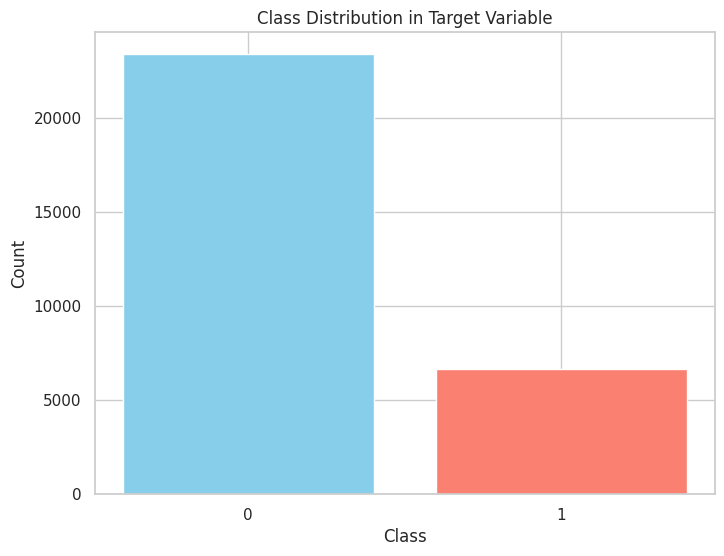

In [83]:
#Target Variable Analysis (Classification) - Class Imbalance Check

class_counts = df['default.payment.next.month'].value_counts()
print(class_counts)

neg, pos = np.bincount(df['default.payment.next.month'])
total = neg + pos
print('Total: {}. Default Payment(Yes): {} ({:.2f}% of total)'.format(total, pos, 100 * pos / total))

#Visualize in a bar plot

plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'salmon'])
plt.title('Class Distribution in Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(class_counts.index) # Ensure ticks are at class labels
plt.show()

default.payment.next.month: is the target variable which is denoted by 1 or 0[Default payment (1=yes, 0=no)]

In the above plot,Class 0 indicates there is no default payment and is indicated by blue and Class 1 indicates there is default payment and is indicated by orange color.

We can see that there is class imbalance is there between the 2 classes.



**Data Cleaning Summary:**



1.   There are 3 categorical variables in this dataset.Education,Sex and Marriage

1.   EDUCATION column - Has values[0,1,2,3,4,5,6] - 0,5 and 6 can be grouped under 4 (since there are like outliers , very less data in that group)

1.   Marriage column - Has value 0 - can be grouped under 3(Others)
2.   Replace PAY_0 with PAY_1 for Consistency


2.   There are no duplicates and no missing values


2.   There is class imbalance between the 2 classes where most of the samples are from Class 0.Sampling or SMOT technique can be implemented.


**Note:** The remaining data preprocessing steps are done after EDA







# Exploratory Data Analysis:

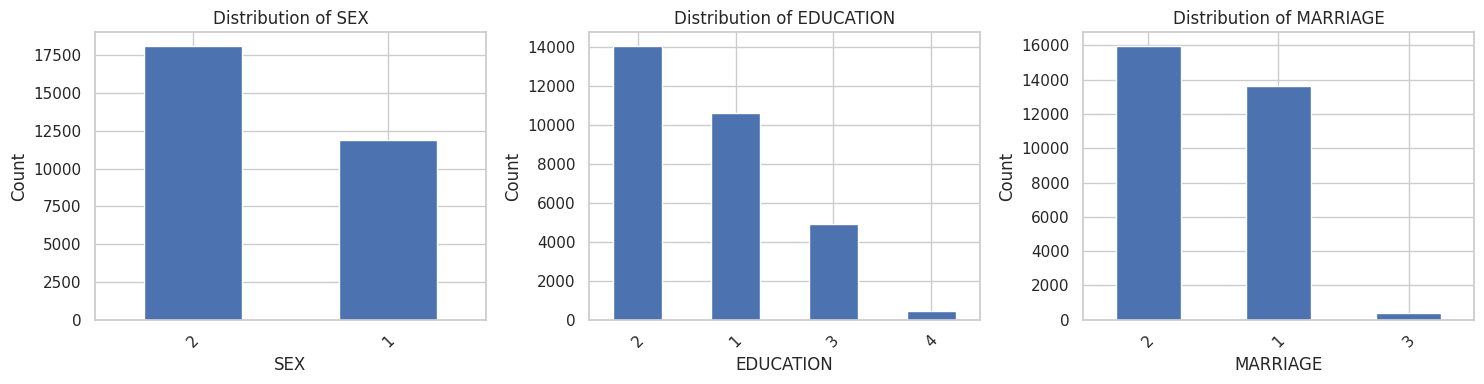

In [84]:
#Categorical Feature Analysis - Univariate Analysis

#We have 3 categorical features . Sex , Education and Marriage

categorical_cols = ['SEX','EDUCATION','MARRIAGE']

fig,axes = plt.subplots(1,3,figsize=(15,4))

for ax,col in zip(axes,categorical_cols):
  df[col].value_counts().plot(kind='bar',ax=ax)
  ax.set_title(f'Distribution of {col}')
  ax.set_xlabel(col)
  ax.set_ylabel('Count')
  ax.tick_params(axis='x',rotation=45)

plt.tight_layout()
plt.show()

The above plot shows the distribution of the Categorical Variables (SEX,EDUCATION and MARRIAGE) on the default status.From the above plot, we can infer that
1.   Total female count is more than the males.
1.   Graduate School and University is high compared to the others.
2.   Married and Single is more than others.




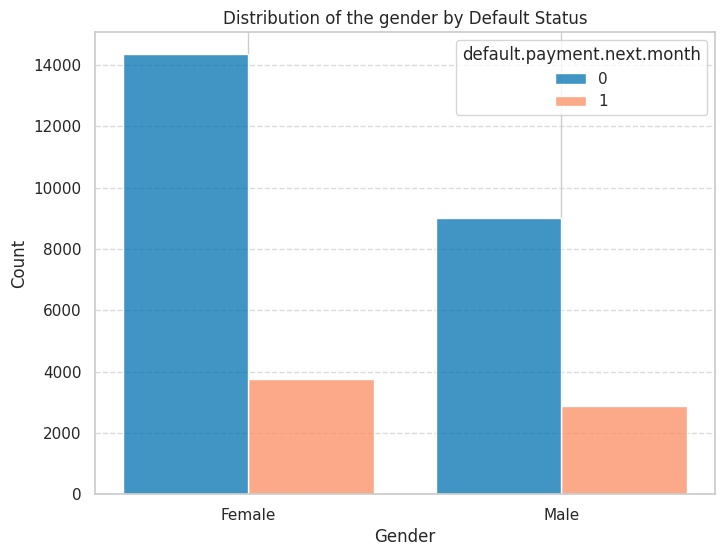

In [85]:
#SEX Category Analysis

sex_labels = {1: 'Male', 2: 'Female'}
sex_palette = {0: "#0072B2", 1: "#FC8D62"}

fig, ax = plt.subplots(figsize=(8, 6))
plot = sns.histplot(data=df,
                    x=df['SEX'].replace(sex_labels),
                    hue='default.payment.next.month',
                    multiple="dodge",
                    discrete=True,
                    shrink=0.8,
                    palette=sex_palette,
                    ax=ax)
title = ax.set_title("Distribution of the gender by Default Status")
ylabel = ax.set_ylabel('Count')
xlabel = ax.set_xlabel('Gender')
grid = plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [86]:
gender_counts = df['SEX'].value_counts()

print(f"Total Males:{gender_counts[1]}")
print(f"Total Females:{gender_counts[2]}")

print(f"\nMale Proportion:{(gender_counts[1] / len(df) * 100).round(2)}")
print(f"Female Proportion:{(gender_counts[2] / len(df) * 100).round(2)}")

print(f"\nMale_defaulters:{df[df['SEX'] == 1]['default.payment.next.month'].value_counts()[1]}")
print(f"Female_defaulters:{df[df['SEX'] == 2]['default.payment.next.month'].value_counts()[1]}")

male_defaulters = df[df['SEX'] == 1]['default.payment.next.month'].value_counts()[1]
female_defaulters = df[df['SEX'] == 2]['default.payment.next.month'].value_counts()[1]
print(f"\nMale Defaulters Proportion:{(male_defaulters / gender_counts[1] * 100).round(2)}")
print(f"Female Defaulters Proportion:{(female_defaulters / gender_counts[2] * 100).round(2)}")

Total Males:11888
Total Females:18112

Male Proportion:39.63
Female Proportion:60.37

Male_defaulters:2873
Female_defaulters:3763

Male Defaulters Proportion:24.17
Female Defaulters Proportion:20.78


From the above gender analysis , we can see that though the total numbers of females is higher(60%) than the males,Males are most likely to make the default payment (24% of the total males) than the females.

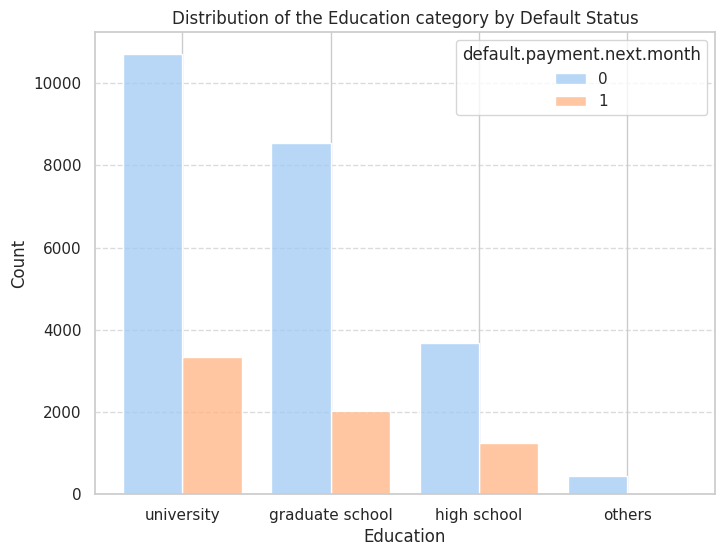

In [87]:
#Education Category Analysis

education_labels = {1: 'graduate school', 2: 'university', 3: 'high school',4: 'others'}
#education_palette = {0: "#0072B2", 1: "#FC8D62" }

df['EDUCATION_LABEL'] = df['EDUCATION'].replace(education_labels)
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=df,
                    x='EDUCATION_LABEL',
                    hue='default.payment.next.month',
                    multiple="dodge",
                    discrete=True,
                    shrink=0.8,
                    palette='pastel',
                    ax=ax)
title = ax.set_title("Distribution of the Education category by Default Status")
ylabel = ax.set_ylabel('Count')
xlabel = ax.set_xlabel('Education')
grid = plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [88]:
education_counts = df['EDUCATION'].value_counts()

graduate_school = education_counts[1]
university = education_counts[2]
high_school = education_counts[3]
others = education_counts[4]

#Defaulters under each category of Education
graduate_schools_defaulters = df[df['EDUCATION']==1]['default.payment.next.month'].value_counts()[1]
university_defaulters = df[df['EDUCATION']==2]['default.payment.next.month'].value_counts()[1]
high_school_defaulters = df[df['EDUCATION']==3]['default.payment.next.month'].value_counts()[1]
others_defaulters = df[df['EDUCATION']==4]['default.payment.next.month'].value_counts()[1]

#Non Defaulters under each category
graduate_schools_nondefaulters = df[df['EDUCATION']==1]['default.payment.next.month'].value_counts()[0]
university_nondefaulters = df[df['EDUCATION']==2]['default.payment.next.month'].value_counts()[0]
high_school_nondefaulters = df[df['EDUCATION']==3]['default.payment.next.month'].value_counts()[0]
others_nondefaulters = df[df['EDUCATION']==4]['default.payment.next.month'].value_counts()[0]

print("Defaulters under each category of Education:")
print(f"Graduate_schools_defaulters:{graduate_schools_defaulters}")
print(f"University Defaulters:{university_defaulters}")
print(f"High School Defaulters:{high_school_defaulters}")
print(f"Other Category:{others_defaulters}")
print("\n")
print("NonDefaulters under each category of Education:")
print(f"Graduate_schools_Nondefaulters:{graduate_schools_nondefaulters}")
print(f"University NonDefaulters:{university_nondefaulters}")
print(f"High School NonDefaulters:{high_school_nondefaulters}")
print(f"Other Category NonDefaulters:{others_nondefaulters}")

Defaulters under each category of Education:
Graduate_schools_defaulters:2036
University Defaulters:3330
High School Defaulters:1237
Other Category:33


NonDefaulters under each category of Education:
Graduate_schools_Nondefaulters:8549
University NonDefaulters:10700
High School NonDefaulters:3680
Other Category NonDefaulters:435


Education Category has values (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown).For Visulaization purpose and as a data cleaning procedure, category 5 & 6(Unknown) are grouped along with 4(Others).

From the above plot and the findings, Most of the defaulters and Non defaulters class belong to Graduate School and University category.Others contributed very low or there might not have been enough data in that category.

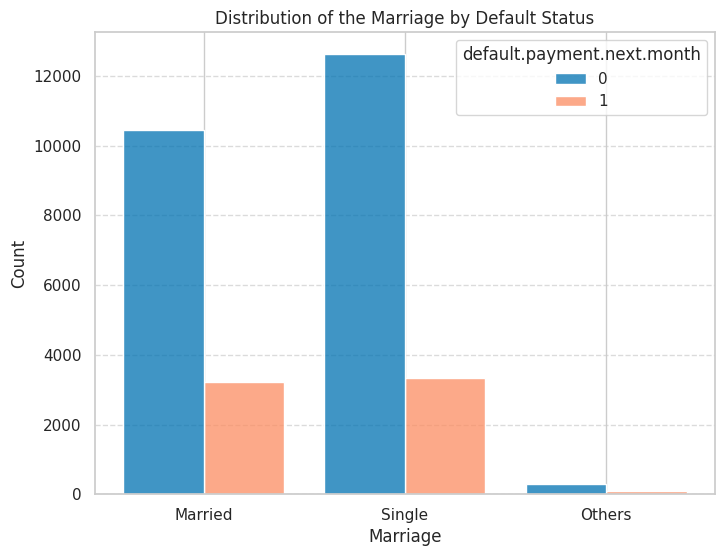

In [89]:
#Marriage Category Analysis

marriage_labels = {1: 'Married', 2: 'Single' , 3: 'Others'}
marriage_palette = {0: "#0072B2", 1: "#FC8D62"}

fig, ax = plt.subplots(figsize=(8, 6))
plot = sns.histplot(data=df,
                    x=df['MARRIAGE'].replace(marriage_labels),
                    hue='default.payment.next.month',
                    multiple="dodge",
                    discrete=True,
                    shrink=0.8,
                    palette=marriage_palette,
                    ax=ax)
title = ax.set_title("Distribution of the Marriage by Default Status")
ylabel = ax.set_ylabel('Count')
xlabel = ax.set_xlabel('Marriage')
grid = plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [90]:
marriage_counts = df['MARRIAGE'].value_counts()

print(f"Total Married:{marriage_counts[1]}")
print(f"Total Single:{marriage_counts[2]}")
print(f"Total Others Category:{marriage_counts[3]}")

print(f"\nMarried_defaulters:{df[df['MARRIAGE'] == 1]['default.payment.next.month'].value_counts()[1]}")
print(f"Single_defaulters:{df[df['MARRIAGE'] == 2]['default.payment.next.month'].value_counts()[1]}")
print(f"Others_Category_defaulters:{df[df['MARRIAGE'] == 3]['default.payment.next.month'].value_counts()[1]}")

print(f"\nMarried_nondefaulters:{df[df['MARRIAGE'] == 1]['default.payment.next.month'].value_counts()[0]}")
print(f"Single_nondefaulters:{df[df['MARRIAGE'] == 2]['default.payment.next.month'].value_counts()[0]}")
print(f"Others_Category_nondefaulters:{df[df['MARRIAGE'] == 3]['default.payment.next.month'].value_counts()[0]}")

Total Married:13659
Total Single:15964
Total Others Category:377

Married_defaulters:3206
Single_defaulters:3341
Others_Category_defaulters:89

Married_nondefaulters:10453
Single_nondefaulters:12623
Others_Category_nondefaulters:288


From the above plot and data, we can see that those who are single are the major defaulters in credit card payment.

Single - Singles are more in raw count and the number of defaulters is noticably lower. Married - Same as Singles , married also has slightly lower defaulters than Singles. Others - Have few defaulters and the overall count is also low.We need more data to explore this.

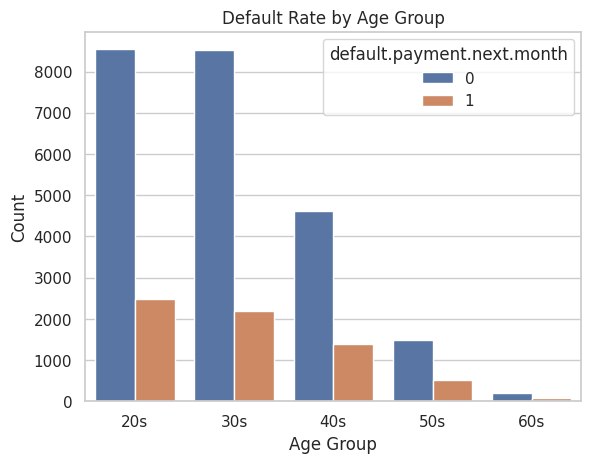

In [91]:
#Explore Age

#df['AGE'].unique()

df['AGE_BIN'] = pd.cut(df['AGE'], bins=[20,30,40,50,60,70], labels=['20s','30s','40s','50s','60s'])
sns.countplot(x='AGE_BIN', hue='default.payment.next.month', data=df)
plt.title('Default Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()



1.   Most defaults occur in the 20s age group where the population is high.

1.   As age increases, the number of defaulters decreases steadily.
2.   The default rate appears to decrease with age , suggesting older ones have more financial stability.


2.   Younger indivuduals are more likely to default because they might have less income , higher spending relative to earnings , less established credit history.







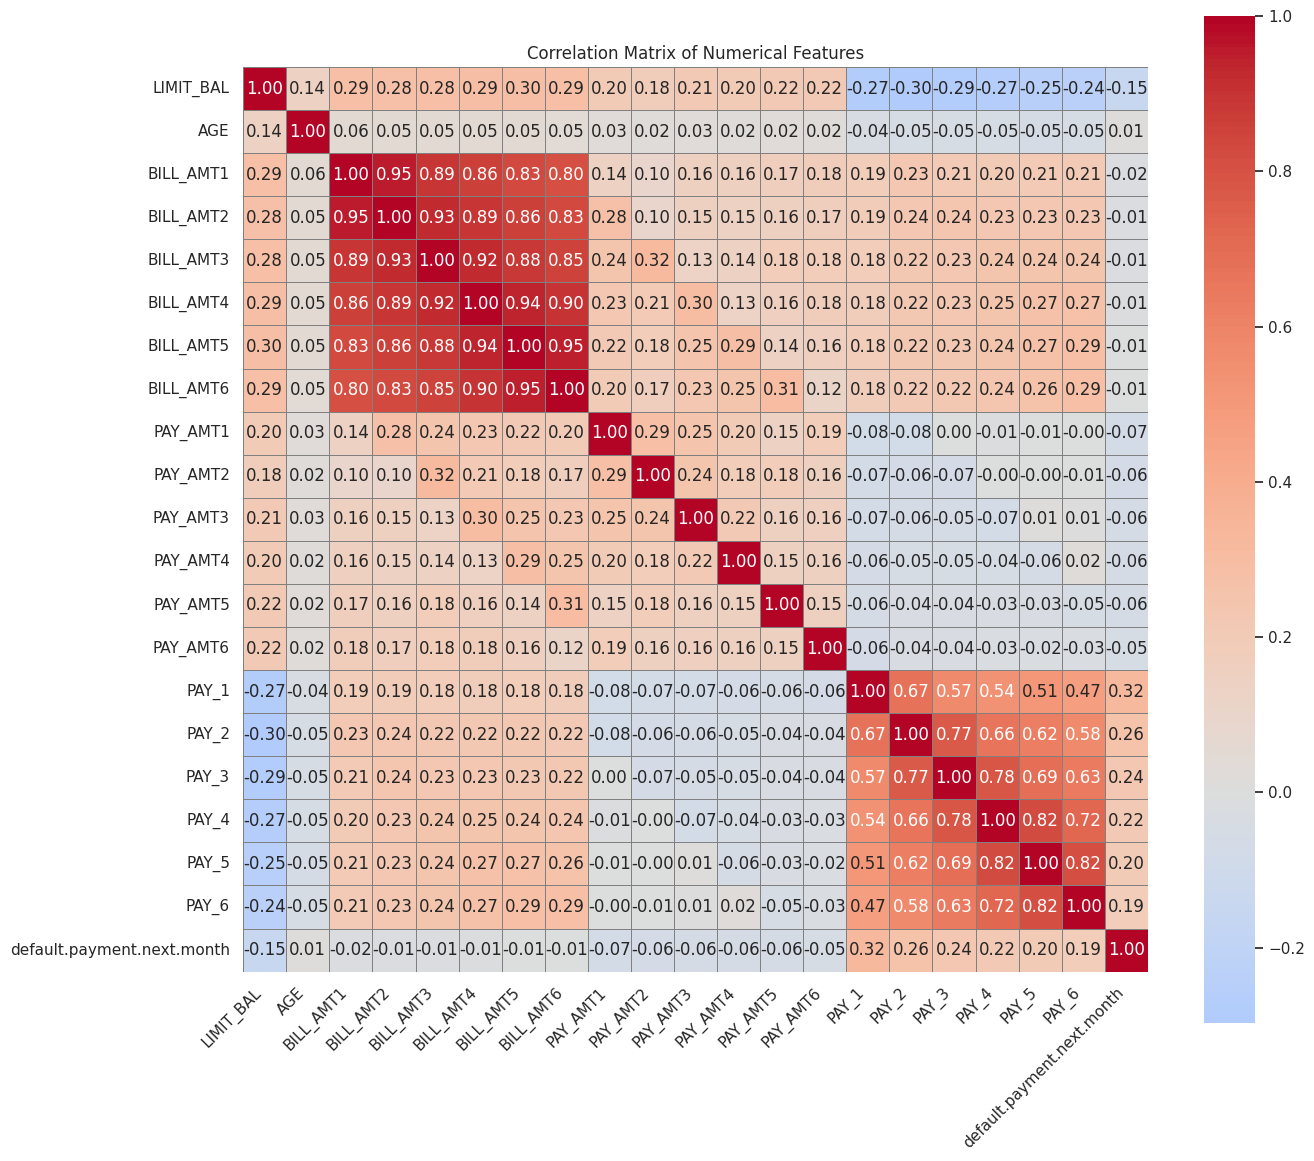

In [92]:
#Explore Numerical Columns
#Corelation Matrix to visualize relationship among numerical features

numerical_features = ['LIMIT_BAL', 'AGE'] + \
                    [f'BILL_AMT{i}' for i in range(1, 7)] + \
                    [f'PAY_AMT{i}' for i in range(1, 7)] + \
                    [f'PAY_{i}' for i in range(1, 7)] + \
                    ['default.payment.next.month']

corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, linecolor='gray', square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The above heatmap indicates how the numerical features are corelated to each other.

**Positive Correlation:**

BILL_AMT1 to BILL_AMT6 show very positive correlations with each other suggesting monthly bill amounts are consistent over time.

PAY_AMT1 to PAY_AMT6 also show positive correlation indicating payment behavior is stable across months. Both these features capture similar financial behavior.

**Moderate Correlation:**

LIMIT_BAL has moderate correlation with BILL_AMT1 to BILL_AMT6.Slight positive correlation with PAY_AMT features.

**Target (default.payment.next.month):**

Weak correlation with most features including PAY_AMT,BILL_AMT and PAY features.

This implies that no single feature contributes to prediction.A combination of features may be needed.

In [93]:
#Compute Variance Inflation Factor to check MultiCollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
bill_cols = [f'BILL_AMT{i}' for i in range(1,7)]
df_bills = df[bill_cols]
vif_data = pd.DataFrame()
vif_data['feature'] = bill_cols
vif_data['VIF'] = [variance_inflation_factor(df_bills.values,i) for i in range (len(bill_cols))]
vif_data

,feature,VIF
0,BILL_AMT1,15.676637
1,BILL_AMT2,23.660203
2,BILL_AMT3,15.685823
3,BILL_AMT4,19.294916
4,BILL_AMT5,22.604274
5,BILL_AMT6,13.820638


Variance Inflation Factor(VIF) is a standard way to measure multicollinearity.

If VIF > 5 , Moderate Multicollinearity
   VIF > 10, Severe Multicollinearity

For BILL_AMT , we can see that VIF values are greater than 20 which means they have severe multicollinearity.


*   Models like RandomForest,XGBoost and LightBGM are not affected by MultiCollinearity.
*   Either we can drop all the columns and keep the recent bill amount or we can have a single combined feature.

For this project, am also used to test the other models which are not affected by Multicollinearity like RandomForest etc.



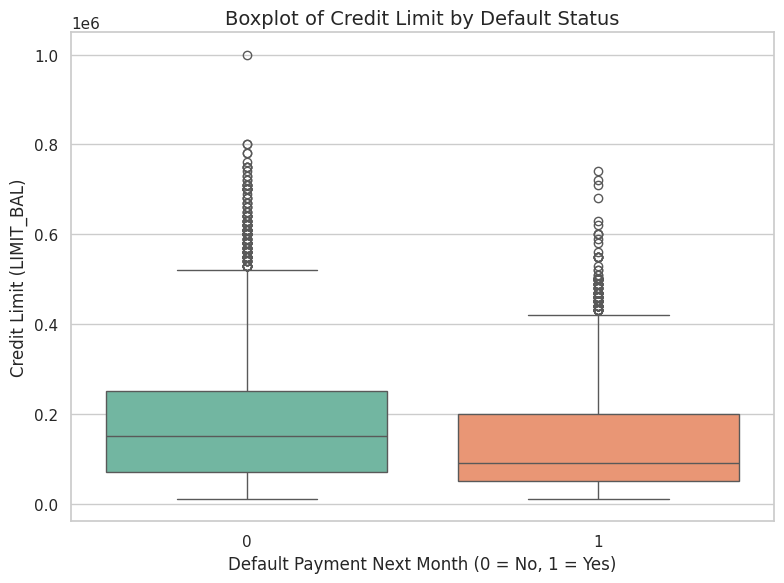

In [94]:
#Numerical(LIMIT_BAL vs Default Status)

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x='default.payment.next.month', y='LIMIT_BAL', data=df, palette='Set2')
plt.xlabel('Default Payment Next Month (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Credit Limit (LIMIT_BAL)', fontsize=12)
plt.title('Boxplot of Credit Limit by Default Status', fontsize=14)
plt.tight_layout()
plt.show()

Observations from the above box plot:

**Median Credit Limit:**



1.   Non defaulters have high median credit limit.

2.   Defaulters have low credit limit.

**Interquartile range:**



1.   The box for non-defaulters is wider, meaning their credit limits vary more.
2.   Defaulters have a narrower range, suggesting more consistency in their credit limits.


**Outliers:** -Both groups have outliers esp some non defaulters have very high credit limit. I am not going to remove outliers here, because they capture the customer behaviour.

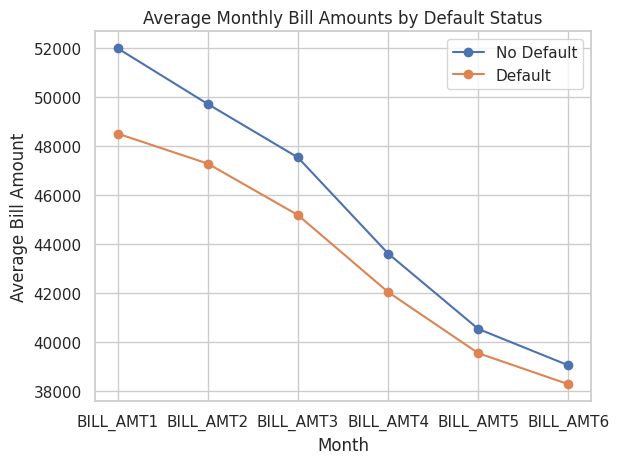

In [95]:
#Explore BILL_AMT 1 to 6 by Default Status
#Line Plot

bill_cols = [f'BILL_AMT{i}' for i in range(1, 7)]
df_grouped = df.groupby('default.payment.next.month')[bill_cols].mean().T
df_grouped.columns = ['No Default', 'Default']
df_grouped.plot(marker='o')
plt.title('Average Monthly Bill Amounts by Default Status')
plt.xlabel('Month')
plt.ylabel('Average Bill Amount')
plt.show()

The above plot shows the average bill amounts by Default status. From the above line plot, we can see that though the defaulters have lower average bill payments than no defaulters , they did not make the payments.

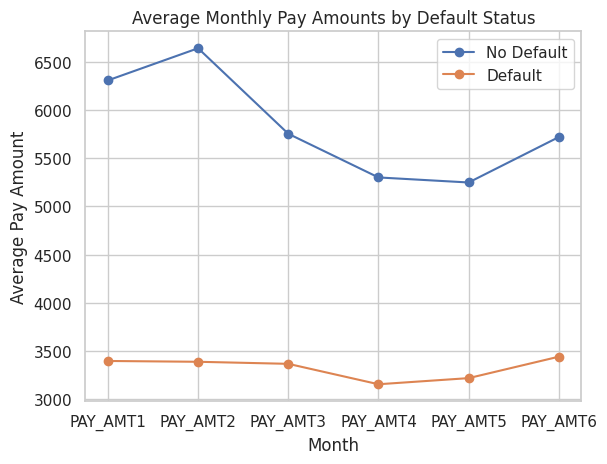

In [96]:
#Explore PAY_AMT 1 to 6 by Default Status
#Line Plot

pay_cols = [f'PAY_AMT{i}' for i in range(1, 7)]
df_grouped = df.groupby('default.payment.next.month')[pay_cols].mean().T
df_grouped.columns = ['No Default', 'Default']
df_grouped.plot(marker='o')
plt.title('Average Monthly Pay Amounts by Default Status')
plt.xlabel('Month')
plt.ylabel('Average Pay Amount')
plt.show()

**Interpretation:**



1.   Non-defaulters tend to make larger payments suggesting financial flexibility.

1.   Defaulters show consistently low payments which indicates risk behavior.
2.   The gap between the 2 lines indicate a highly predictive behavior.


2.   Payment behavior is strongly correlated with default risk.








In [97]:
#Statistical Tests
#Chi-Square Test - Shows which categories are associated with Target
categorical_cols = ['SEX','EDUCATION','MARRIAGE']

for col in categorical_cols:
  table = pd.crosstab(df[col],df['default.payment.next.month'])
  chi2,p,dof,expected = chi2_contingency(table)
  print(f"\nFeature:{col}")
  print("Chi-square:",chi2)
  print("p-value",p)


Feature:SEX
Chi-square: 47.70879689062111
p-value 4.944678999412044e-12

Feature:EDUCATION
Chi-square: 160.40995107224546
p-value 1.4950645648106153e-34

Feature:MARRIAGE
Chi-square: 28.13032464482199
p-value 7.790720364202813e-07


**Interpretation:**

*   Chi-Square tests show that all 3 categorical features are significantly associated with Default.(p<0.001 for all)
*   Education is strongest among the three.(Chi-value is much higher)
*   SEX and Marriage are weaker but still significant





In [98]:
#ANOVA/t-Test shows which numeric features affect the Target

numeric_columns = ['LIMIT_BAL','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
                   'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                   'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

for col in numeric_columns:
  group0 = df[df['default.payment.next.month']==0][col]
  group1 = df[df['default.payment.next.month']==1][col]

  f_stat,p_value = f_oneway(group0,group1)

  print(f"\nFeature:{col}")
  print("F-statistic:",f_stat)
  print("p-value",p_value)



Feature:LIMIT_BAL
F-statistic: 724.0685392611704
p-value 1.3022439532684209e-157

Feature:PAY_1
F-statistic: 3537.714969626714
p-value 0.0

Feature:PAY_2
F-statistic: 2239.1691358466046
p-value 0.0

Feature:PAY_3
F-statistic: 1757.4664440265153
p-value 0.0

Feature:PAY_4
F-statistic: 1476.8459673526736
p-value 1.899296587e-315

Feature:PAY_5
F-statistic: 1304.5911757099154
p-value 1.1266079545105531e-279

Feature:PAY_6
F-statistic: 1085.402485120263
p-value 7.296740483304627e-234

Feature:BILL_AMT1
F-statistic: 11.580531516293622
p-value 0.0006673295491269827

Feature:BILL_AMT2
F-statistic: 6.044237892358572
p-value 0.013957362392557893

Feature:BILL_AMT3
F-statistic: 5.9443877084599
p-value 0.014769982710844272

Feature:BILL_AMT4
F-statistic: 3.094745184782304
p-value 0.07855564157726781

Feature:BILL_AMT5
F-statistic: 1.3710873966293107
p-value 0.24163444291518688

Feature:BILL_AMT6
F-statistic: 0.8658202918873861
p-value 0.35212252122434606

Feature:PAY_AMT1
F-statistic: 160.403809

**Interpretation:**

*   PAY_ features are by far the strongest numeric predictors of default.Their f-staistic value is very high and p-value is extremely close to 0.
*   Next significant predictor of Target is LIMIT_BAL (F-statistic - 724)
*   PAY_AMT 1 to 6 are also significant predictors.
*   BILL_AMT 1,2 and 3 are moderately significant with F-statistics score of 5 to 11
*   BILL_AMT 4,5 and 6 are not statistically significant.

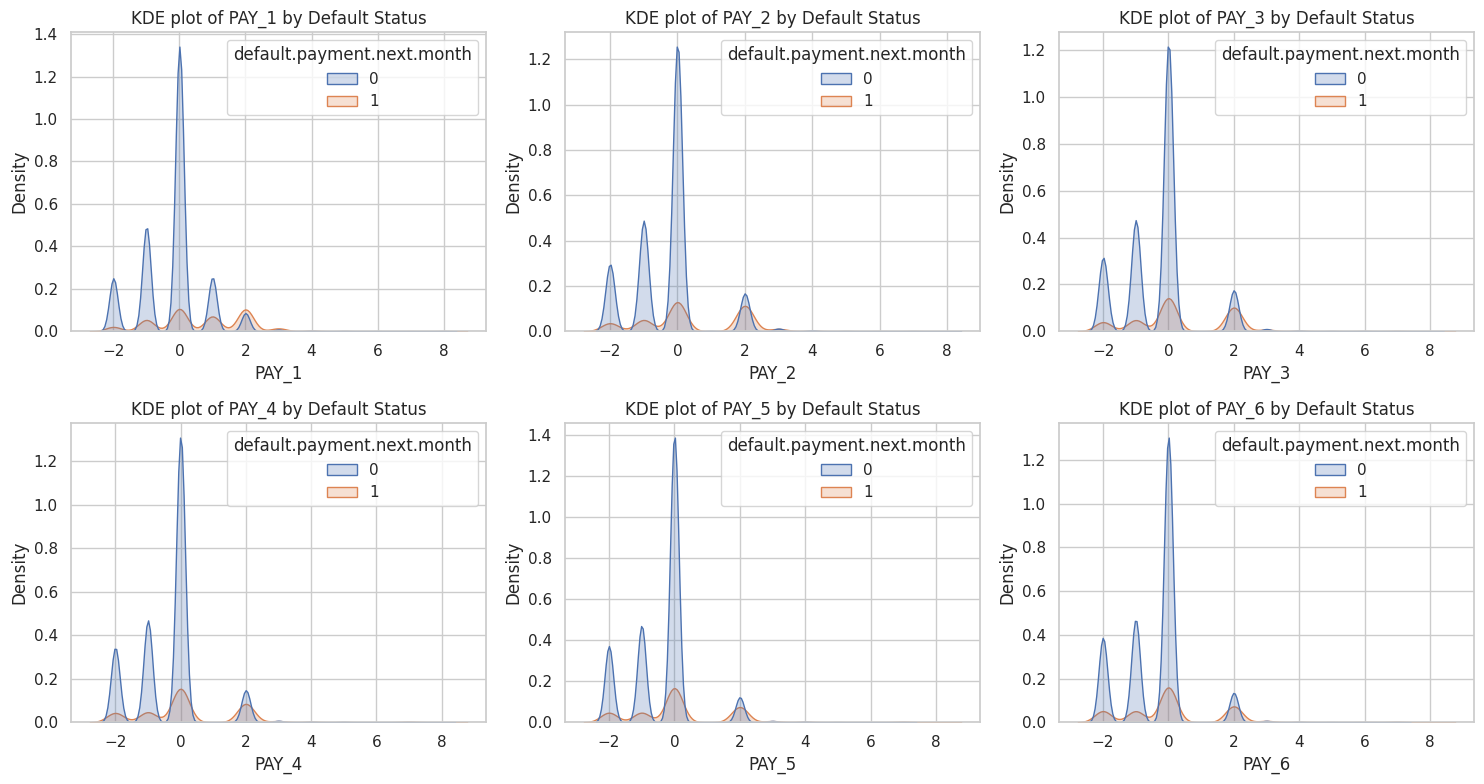

In [99]:
#kde-plot
#According to the Seaborn documentation, kde plot is a method for visualizing the distribution of observations in a dataset.
#KDE plot for the strongest predictors found using statistical tests

strong_cols = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

fig,axes = plt.subplots(2,3,figsize=(15,8))
axes_flat = axes.flatten()

for ax,col in zip(axes_flat,strong_cols):
  sns.kdeplot(data=df,x=col,hue='default.payment.next.month',fill=True,ax=ax)
  ax.set_title(f'KDE plot of {col} by Default Status')

for j in range(len(strong_cols),len(axes_flat)):
  fig.delaxes(axes_flat[j])

plt.tight_layout()
plt.show()

**Interpretation:**
*   kde plot for PAY_1 shows a sharp contrast between defaulters and non-defaulters.Defaulters show a wide spread of delayed payments which they delayed the payments by 2 months.This matches with the statistical results.
*   In general, we can see from all the plots that non-defaulters show sharp paks at 0, which means they pay on time, while defaulters show much broader distributions towards positive values





**EDA Summary:**

1) All the 3 Categorical features were analyzed.I visualized the distribution of all the 3 categorical variables -Education -Marriage -Sex

2)In the distribution of gender by default status,because of class imbalance,Class 0 is predominatly found in both male and female. we can see that though the total numbers of females is higher(60%) than the males, Males are most likely to make the default payment (24% of the total males) than the females.

3)Most of the defaulters and Non defaulters class belong to Graduate School and University category.Others contributed very low or there might not have been enough data in that category.

4)In the Marriage Category analysis,most of the defaulters belong to 'Single' and 'Married' category.

5)'Age' category has been grouped into bins for visualization purpose.I can see that most of the defaulters belong to the 20s categry since they might not have enough savings.

6)From the correlation matrix, it is clear that LIMIT_BAL and PAY_1 have high corrrelation to the default payment. This makes sense because amount of credit and their repayment status in the first month is important indetermining the default clients.

7)VIF was used to check for multicollinearity. BILL_AMT features have high multicollinearity.Since Models like RandomForest,XGBoost and LightBGM are not affected by MultiCollinearity, I am not going to drop this feature.

8)People who did not default were generally trusted with higher and more variable credit limits. Those who defaulted were typically assigned lower limits, possibly reflecting risk-based credit assignment.

9)Chi-Square tests on the categorical columns were done which showed 'Education' is the strongest among the three.

10)ANNOVA test showed that PAY_AMT features are the strongest predictors of the Target.

11)For the strongest predictors found using statistical tests, kde plot was implemented and was found that the recent payment delays are the clear predictors of Target.

# Data Preprocessing (Stage 2)

In [100]:
#One hot encoding - MARRIAGE and EDUCATION
#Since MARRIAGE and EDUCATION columns does not have ordinal relationship, one hot encoding
#is the appropriate technique for ML models like Logestic regression and SVM.

columns_to_encode = ['EDUCATION','MARRIAGE']
df_encoded = pd.get_dummies(df,columns=columns_to_encode,prefix = columns_to_encode)

print("Shape of dataframe before encoding:",df.shape)
print("Shape of dataframe after encoding:",df_encoded.shape)

print(df_encoded.filter(regex='^(EDUCATION_|MARRIAGE_)').head())

Shape of dataframe before encoding: (30000, 27)
Shape of dataframe after encoding: (30000, 32)
  EDUCATION_LABEL  EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
0      university        False         True        False        False   
1      university        False         True        False        False   
2      university        False         True        False        False   
3      university        False         True        False        False   
4      university        False         True        False        False   

   MARRIAGE_1  MARRIAGE_2  MARRIAGE_3  
0        True       False       False  
1       False        True       False  
2       False        True       False  
3        True       False       False  
4        True       False       False  


In [101]:
#Change the encoded columns to 0/1

dummy_cols = [col for col in df_encoded.columns
              if df_encoded[col].dtype == 'bool']

df_encoded[dummy_cols] = df_encoded[dummy_cols].astype(int)

print(df_encoded.filter(regex='^(EDUCATION_|MARRIAGE_)').head())
print(df_encoded[dummy_cols].dtypes.unique())

  EDUCATION_LABEL  EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
0      university            0            1            0            0   
1      university            0            1            0            0   
2      university            0            1            0            0   
3      university            0            1            0            0   
4      university            0            1            0            0   

   MARRIAGE_1  MARRIAGE_2  MARRIAGE_3  
0           1           0           0  
1           0           1           0  
2           0           1           0  
3           1           0           0  
4           1           0           0  
[dtype('int64')]


In [102]:
#Dropping redundant columns
df_encoded.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month',
       'EDUCATION_LABEL', 'AGE_BIN', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In the above columns list, 'ID' column can be removed since we have index.So its repetitive. EDUCATION_LABEL is used only for plotting purpose.So, it can be removed. Original columns ['EDUCATION'] and ['MARRIAGE'] are removed after one hot encoding.

In [103]:
df_encoded = df_encoded.drop(['ID','EDUCATION_LABEL'],axis=1)
df_encoded = df_encoded.drop(['AGE_BIN'],axis=1)
df_encoded.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

# Separate Features and Target

In [104]:
#Separate Features and Target

keep_cols = ['LIMIT_BAL', 'SEX', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3']
X = df_encoded[keep_cols]
y = df_encoded['default.payment.next.month']

# Train/Test/Validation Split

1)Train - The model learns the pattern from the training data.Used for fitting the model.

2)Validation - Helps to choose the best model before the test set

3)Test - Gives an unbiased final model performance

In [105]:
#Train/Test/Validation Split

#Train-Test Split
#Split into train+val(80%) and test set(20%)
X_train_val,X_test,y_train_val,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

#Split train+val into final train(60%) and val set(20%)
X_train,X_val,y_train,y_val = train_test_split(X_train_val,y_train_val,test_size=0.25,random_state=42,stratify=y_train_val)

#This gives 60% training set,20% validation and test set
#Stratify ensures all the splits maintain the same class distribution which is important for imbalanced datasets.

#Check Split sizes

print(f"Train size: {X_train.shape[0]}")
print(f"Validation size: {X_val.shape[0]}")
print(f"Test size: {X_test.shape[0]}")

Train size: 18000
Validation size: 6000
Test size: 6000


# Feature Selection:

Based on Chi-Square and Annova test analysis, the strongest predictors(PAY_1 TO PAY6),LIMIT_BAL,AGE,SEX,PAY_AMT1 TO PAY_AMT6,BILL_AMT1_BILL_AMT3 are kept. BILL_AMT4 TO BILL_AMT6 are removed.

In [106]:
#Feature Selection

df_encoded = df_encoded.drop(['BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis=1)
df_encoded.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

# Feature Scaling

All the numerical features will be on a similar scale so that none of the single feature dominates the others because of their value.

In [107]:
#Feature Scaling (Fit on Train/Transform on Others)

#Feature Scaling and Normalization

#Feature Engineering or Data Preprocessing

#Normalize BILL_AMT and PAY_AMT features (Standardization)

bill_cols = [f'BILL_AMT{i}' for i in range(1, 4)]
pay_amt_cols = [f'PAY_AMT{i}' for i in range(1, 7)]
pay_cols = [f'PAY_{i}' for i in range(1, 7)]
other_numeric = ['LIMIT_BAL', 'AGE']
scale_cols = bill_cols + pay_amt_cols + pay_cols + other_numeric
scaler = StandardScaler()

#Fit scalar on training data only to avoid data leakage
X_train.loc[:,scale_cols] = scaler.fit_transform(X_train[scale_cols])

#Transform validation and test sets using the same scaler
X_val.loc[:,scale_cols] = scaler.transform(X_val[scale_cols])
X_test.loc[:,scale_cols] = scaler.transform(X_test[scale_cols])

# Handle Class Imbalance

In [108]:
#Handle Class Imbalance (SMOTE) - Training set only

#Check for NaNs

if X_train.isnull().values.any():
  print('Detected NaNs')
  X_train = X_train.fillna(0)
sm = SMOTE(random_state=42)

#Check for Infinity

if not np.isfinite(X_train).all().all():
  print('Detected Infinity')
  X_train = X_train.replace([np.inf,-np.inf],0 )

X_res,y_res = sm.fit_resample(X_train,y_train)
print(f"Original shape: {y_train.value_counts().to_dict()}")
print(f"Resampled shape: {y_res.value_counts().to_dict()}")


Original shape: {0: 14018, 1: 3982}
Resampled shape: {0: 14018, 1: 14018}


# Model Training and Evaluation

For the all the below Supervised learning models, performed the following evaluation steps

*   Baseline Models
*   Identified the best hyperparameters using GridSearchCV and applied them to the model
*   Applied Threshold Optimization to improve performance
*   Cross Validation

**Metrics Calculated:**
Classification metrics used for this project:


*   Accuracy - Percentage of correct predictions (Can be used as a quick baseline)
*   Precision - Of all predicted positives , how many are right
*   Recall - Of all the actual positives , how many defaulters were found
*   F1 Score - Harmonic mean of precision and recall
*   ROC-AUC - measures how well the model separates classes

Since the dataset is imbalanced, the best metrics are
F1 Score,Recall(Misssinf defaulters are costly) and Precision (make sures good customers aren't wrongly classified as defaulter)

# **1.Logistic Regression**

In [109]:
#Baseline Models - Logistic Regression

log_model = LogisticRegression(random_state=42)
log_model.fit(X_res,y_res)

LogisticRegression(random_state=42)

In [110]:
#Metric Calculation - Logistic Regression

y_pred = log_model.predict(X_val)
y_proba = log_model.predict_proba(X_val)[:,1]

print("Baseline Logistic Regression Model")
print(f"Accuracy:{(accuracy_score(y_val, y_pred)):.2f}")
print(f"Precision:{(precision_score(y_val, y_pred)):.2f}")
print(f"Recall:{(recall_score(y_val, y_pred)):.2f}")
print(f"F1 Score:{(f1_score(y_val, y_pred)):.2f}")
print(f"ROC AUC:{(roc_auc_score(y_val, y_proba)):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Baseline Logistic Regression Model
Accuracy:0.72
Precision:0.41
Recall:0.59
F1 Score:0.48
ROC AUC:0.73
Confusion Matrix:
 [[3564 1109]
 [ 548  779]]


**Analysis:**

Accuracy - The model correctly predicted the class (either 0 or 1) for 72% of the total cases in the dataset.

Precision - When the model predicted as instance was class 1, it was actually correct only for 41% of the time.

Recall - The model correctly identified 59% of all actual Class 1 instances present in the data.

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      4673
           1       0.41      0.59      0.48      1327

    accuracy                           0.72      6000
   macro avg       0.64      0.67      0.65      6000
weighted avg       0.77      0.72      0.74      6000



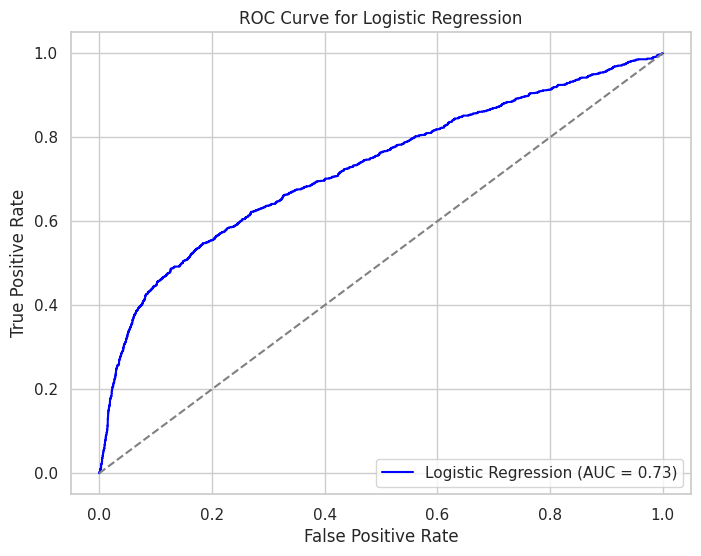

In [111]:

print("Classification Report:\n")
print(classification_report(y_val, y_pred))

roc_auc = roc_auc_score(y_val, y_proba)

fpr, tpr, thresholds = roc_curve(y_val, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



1.   The above plot shows TPR and FPR tradeoff as you vary the decision threshold.

1.   The ROC Curve rises above the diagonal line which represents random guessing.
2.   The Area under the curve is 0.73 is fair , which means model is reasonably good at distinguishing between defaulters and non-defaulters


2.   Since the curve is not touching the top left corner its not perfect







**Hyperparameter Tuning**

In Logistic Regression,parameter C controls regularization.
C too high - Overfitting
C too low - Underfitting

Penalty - L1 vs L2 (Lasso vs Ridge)
L1 - Shrinks some coefficents to zero
L2 - Spreads the weight among all the features


Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


GridSearchCV Logistic Regression Model
Accuracy:0.72
Precision:0.41
Recall:0.59
F1 Score:0.48
ROC AUC:0.73
Confusion Matrix:
 [[3561 1112]
 [ 549  778]]


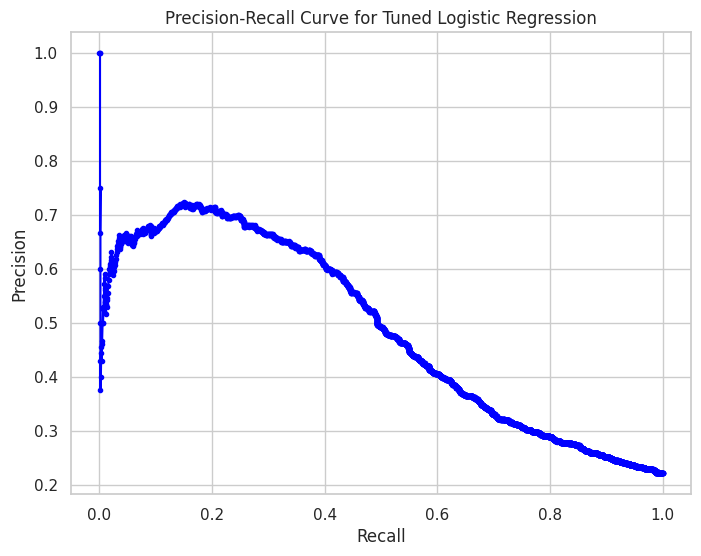

In [112]:
#Find the best parameters with GridSerachCV - Hyperparameter Tuning

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')
grid.fit(X_res, y_res)
print("Best Params:", grid.best_params_)

#Use the best parameters from GridSearchCV to fit in logistic regression model
best_log_model = LogisticRegression(C = grid.best_params_['C'],
                                   penalty = grid.best_params_['penalty'],
                                   solver = grid.best_params_['solver'],
                                   random_state = 42)
best_log_model.fit(X_res,y_res)

#Calculate Metrics

y_pred_gscv = best_log_model.predict(X_val)
y_proba_gscv = best_log_model.predict_proba(X_val)[:,1]

print("\n")
print("GridSearchCV Logistic Regression Model")
print(f"Accuracy:{(accuracy_score(y_val, y_pred_gscv)):.2f}")
print(f"Precision:{(precision_score(y_val, y_pred_gscv)):.2f}")
print(f"Recall:{(recall_score(y_val, y_pred_gscv)):.2f}")
print(f"F1 Score:{(f1_score(y_val, y_pred_gscv)):.2f}")
print(f"ROC AUC:{(roc_auc_score(y_val, y_proba_gscv)):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_gscv))

#Precision recall curve after GridsearchCV

precision, recall, thresholds = precision_recall_curve(y_val, y_proba_gscv)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='blue')
plt.title('Precision-Recall Curve for Tuned Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

Classification Report after GridSearchCV:

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      4673
           1       0.41      0.59      0.48      1327

    accuracy                           0.72      6000
   macro avg       0.64      0.67      0.65      6000
weighted avg       0.77      0.72      0.74      6000



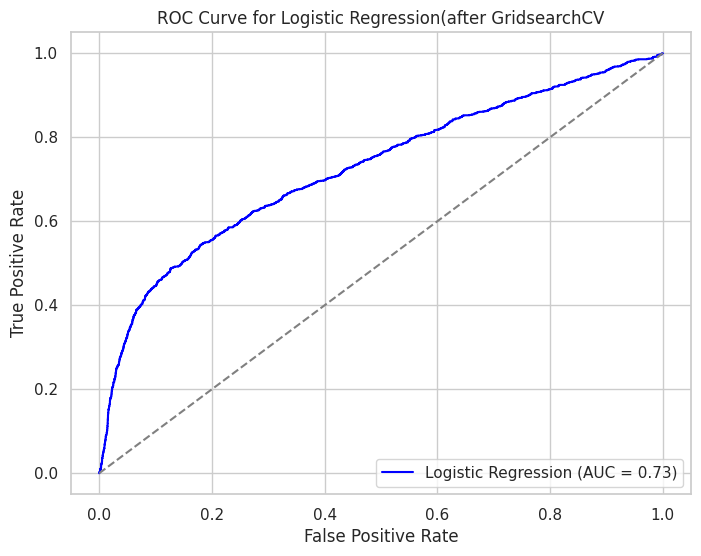

In [113]:
#ROC-AUC Curve for best model after Hyperparameter tuning

print("Classification Report after GridSearchCV:\n")
print(classification_report(y_val, y_pred_gscv))

roc_auc = roc_auc_score(y_val, y_proba_gscv)

fpr, tpr, thresholds = roc_curve(y_val, y_proba_gscv)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression(after GridsearchCV')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Cross Validation:**

In [114]:
#Cross Validation(k-fold)

scores = cross_val_score(best_log_model, X_res, y_res, cv=5, scoring='f1')
print("\n")
print("Cross-validated F1 scores:", scores)
print("Mean F1:", scores.mean())



Cross-validated F1 scores: [0.64541063 0.70440729 0.72607261 0.72693863 0.72776968]
Mean F1: 0.7061197669836994


**Best Threshold Value**



Best Threshold Value 0.5677309148324262


Optimized Threshold Logistic Regression Model
Accuracy:0.79
Precision:0.52
Recall:0.49
F1 Score:0.50
Confusion Matrix:
 [[4082  591]
 [ 680  647]]


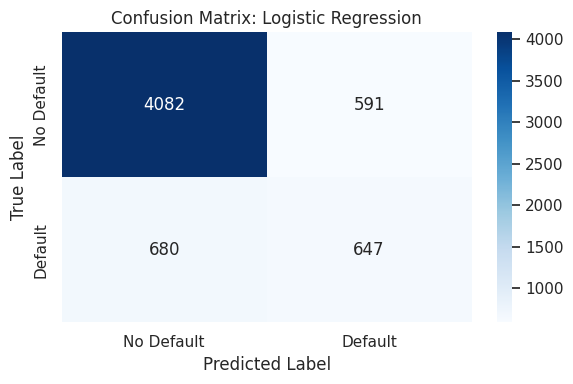

In [115]:
#Best Threshold Value and Metric Calculation

#Find the best threshold to improve accuracy

prec, rec, thresholds = precision_recall_curve(y_val, y_proba_gscv)
f1_scores = 2 * (prec * rec) / (prec + rec)
best_thresh = thresholds[f1_scores.argmax()]
print("\n")
print("Best Threshold Value",best_thresh)

#Apply the best thresold and recalculate the metrics

y_pred_opt = (y_proba_gscv >= best_thresh).astype(int)

print("\n")
print("Optimized Threshold Logistic Regression Model")
print(f"Accuracy:{(accuracy_score(y_val, y_pred_opt)):.2f}")
print(f"Precision:{(precision_score(y_val, y_pred_opt)):.2f}")
print(f"Recall:{(recall_score(y_val, y_pred_opt)):.2f}")
print(f"F1 Score:{(f1_score(y_val, y_pred_opt)):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_opt))

cm_lr = confusion_matrix(y_val, y_pred_opt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

**Logistic Regression Model Summary:**

The baseline and GridSearch CV models gave nearly identical results which means the default settings were near optinal for this dataset.By increasing the threshold to 0.56, the model reduced FalsePositives (from 1109 to 591) but it missed more actual positives .

Mean F1 scores of 0.5 is higher than F1 scores seen on the GridSearchCV.
F1 score is the harmonic mean between precision and recall.

The optimized threshold model is the best choice if we consider accuracy(0.79) and F1 Score(0.50)

# **2.Random Forest Classifier**

In [116]:
#RandomForestClassifier (Basic)

rf_model = RandomForestClassifier(n_estimators=100,class_weight='balanced',max_depth=None,random_state=42,n_jobs=-1)
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [117]:
#Evaluate on Validation set

y_pred_rf = rf_model.predict(X_val)
y_proba_rf = rf_model.predict_proba(X_val)[:,1]

print("Random Forest Classifier")
print(f"Accuracy:{(accuracy_score(y_val, y_pred_rf)):.2f}")
print(f"Precision:{(precision_score(y_val, y_pred_rf)):.2f}")
print(f"Recall:{(recall_score(y_val, y_pred_rf)):.2f}")
print(f"F1 Score:{(f1_score(y_val, y_pred_rf)):.2f}")
print(f"ROC AUC:{(roc_auc_score(y_val, y_proba_rf)):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))

Random Forest Classifier
Accuracy:0.81
Precision:0.66
Recall:0.34
F1 Score:0.44
ROC AUC:0.77
Confusion Matrix:
 [[4440  233]
 [ 882  445]]


Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.66      0.34      0.44      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.64      0.67      6000
weighted avg       0.79      0.81      0.79      6000



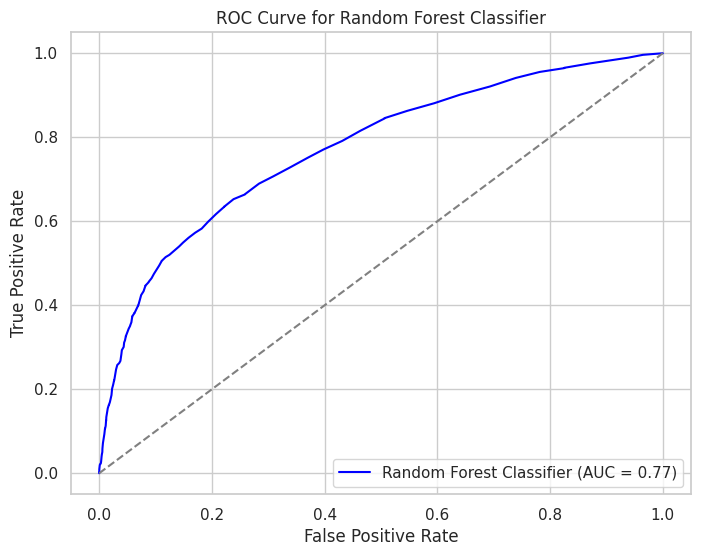

In [118]:
#Classification Report and ROC-AUC Curve

print("Classification Report:\n")
print(classification_report(y_val, y_pred_rf))

roc_auc_rf = roc_auc_score(y_val, y_proba_rf)

fpr1, tpr1, thresholds1 = roc_curve(y_val, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label=f'Random Forest Classifier (AUC = {roc_auc_rf:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

AUC Score 0.77 is better than the baseline model and the curve is above the diagonal line but still the model has to improve furthur.

**HyperparameterTuning:**

In [119]:
#Hyperparameter Tuning using GridSearchCV

param_grid = {'n_estimators':[100,200],
            'max_depth': [None,10,20],
'min_samples_split': [2,5],
'min_samples_leaf':[1,2]}

grid_search_rfc = GridSearchCV(RandomForestClassifier(),param_grid=param_grid,cv=5)
grid_search_rfc.fit(X_train,y_train)

print(grid_search_rfc.best_params_)
print(grid_search_rfc.best_estimator_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestClassifier(max_depth=10, n_estimators=200)


GridSearchCV Random Forest Classifier Model
Accuracy:0.79
Precision:0.53
Recall:0.55
F1 Score:0.54
ROC AUC:0.78
Confusion Matrix:
 [[4035  638]
 [ 595  732]]


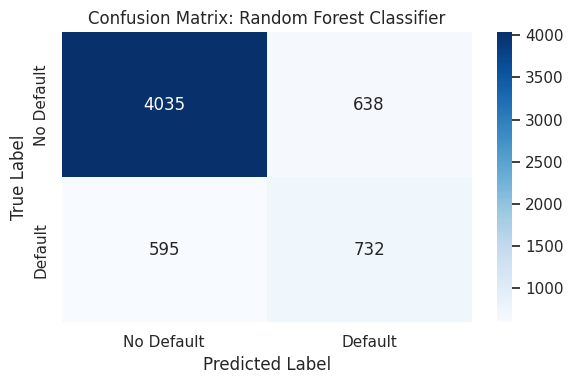

In [120]:
#Updating the model with the best parameters

best_model_rfc = RandomForestClassifier(class_weight='balanced',max_depth=10,
                                    min_samples_leaf=1,
                                    min_samples_split=2,
                                    n_estimators=100)
best_model_rfc.fit(X_train, y_train)

y_pred_rfcgs = best_model_rfc.predict(X_val)
y_proba_rfcgs = best_model_rfc.predict_proba(X_val)[:,1]

print("GridSearchCV Random Forest Classifier Model")
print(f"Accuracy:{(accuracy_score(y_val, y_pred_rfcgs)):.2f}")
print(f"Precision:{(precision_score(y_val, y_pred_rfcgs)):.2f}")
print(f"Recall:{(recall_score(y_val, y_pred_rfcgs)):.2f}")
print(f"F1 Score:{(f1_score(y_val, y_pred_rfcgs)):.2f}")
print(f"ROC AUC:{(roc_auc_score(y_val, y_proba_rfcgs)):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rfcgs))

cm_rfc = confusion_matrix(y_val, y_pred_rfcgs)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix: Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

Classification Report after GridSearchCV:

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4673
           1       0.53      0.55      0.54      1327

    accuracy                           0.79      6000
   macro avg       0.70      0.71      0.71      6000
weighted avg       0.80      0.79      0.80      6000



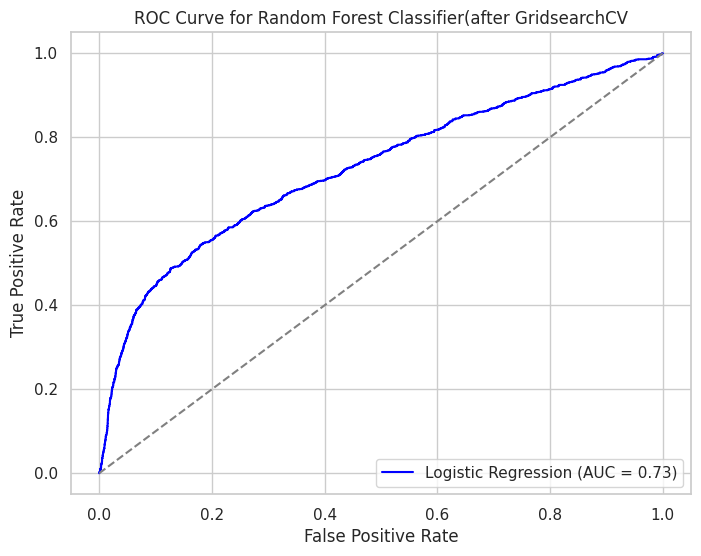

In [121]:
print("Classification Report after GridSearchCV:\n")
print(classification_report(y_val, y_pred_rfcgs))

roc_auc_rfc = roc_auc_score(y_val, y_proba_rfcgs)

fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_val, y_proba_rfcgs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier(after GridsearchCV')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Cross Validation:**



In [122]:

scores_rfc = cross_val_score(best_model_rfc, X_train, y_train, cv=5, scoring='f1')
print("\n")
print("Cross-validated F1 scores:", scores_rfc)
print("Mean F1:", scores_rfc.mean())



Cross-validated F1 scores: [0.51717676 0.56288917 0.533571   0.53040752 0.53503185]
Mean F1: 0.5358152609910068


**Best Threshold**

In [123]:
#Best Threshold Value and Metric Calculation

#Find the best threshold to improve accuracy

prec_rfc, rec_rfc, thresholds_rfc = precision_recall_curve(y_val, y_proba_rfcgs)
f1_scores_rfc = 2 * (prec_rfc * rec_rfc) / (prec_rfc + rec_rfc)
best_thresh_rfc = thresholds_rfc[f1_scores_rfc.argmax()]
print("\n")
print("Best Threshold Value",best_thresh_rfc)

#Apply the best thresold and recalculate the metrics

y_pred_opt_rfcgs = (y_proba_rfcgs >= best_thresh_rfc).astype(int)

print("Optimized Threshold Random Forest Classifier Model")
print(f"Accuracy:{(accuracy_score(y_val, y_pred_opt_rfcgs)):.2f}")
print(f"Precision:{(precision_score(y_val, y_pred_opt_rfcgs)):.2f}")
print(f"Recall:{(recall_score(y_val, y_pred_opt_rfcgs)):.2f}")
print(f"F1 Score:{(f1_score(y_val, y_pred_opt_rfcgs)):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_opt_rfcgs))



Best Threshold Value 0.5033772300746544
Optimized Threshold Random Forest Classifier Model
Accuracy:0.80
Precision:0.54
Recall:0.55
F1 Score:0.54
Confusion Matrix:
 [[4045  628]
 [ 597  730]]


**Random Forest Model Summary:**

The baseline Random Forest Model achieved 81% accuracy with an F1 score of 0.44, works well on Majority class but less on Minority class.After GridSearchCV , the accuracy is 0.79 but the recall increased to 0.55 and F1 score also increased by 0.54.Threshold optimization furthur increased the recall value to 0.55.Cross validation with a mean score of 0.53 indicates model is moderately effective at balancing precision and recall.

# XGBOOST Classifier

In [124]:
#XGBoost Classifier

xgb_model = XGBClassifier(n_estimators=100,class_weight='balanced',max_depth=3,learning_rate=0.1,use_label_encoder=False,
                         eval_metric='logloss',random_state=42)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, ...)

In [125]:
#Evaluation Metrics

y_pred_xgb = xgb_model.predict(X_val)
y_proba_xgb = xgb_model.predict_proba(X_val)[:, 1]

print("Classification Report:\n")
print(classification_report(y_val, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_val, y_proba_xgb))

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.69      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.81      0.82      0.80      6000

ROC AUC Score: 0.7808204421462035


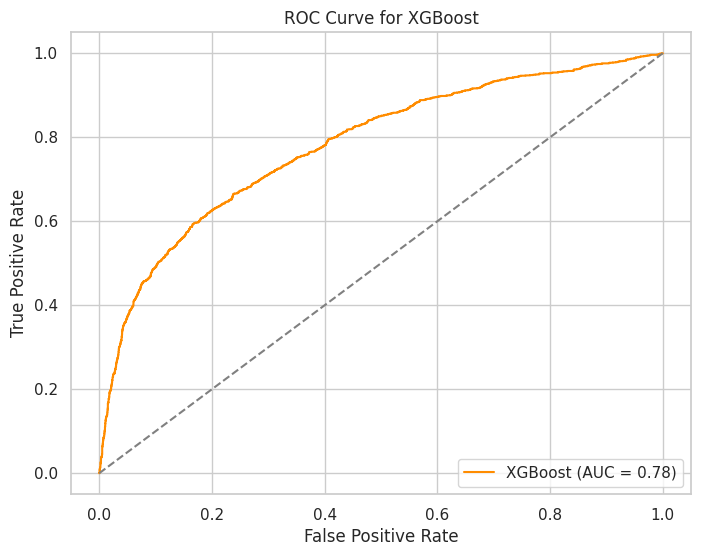

In [126]:
#ROC Curve - XGBoost Classifier

fpr_xgb, tpr_xgb, _ = roc_curve(y_val, y_proba_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(roc_auc_score(y_val, y_proba_xgb)), color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [127]:
#Evaluation Metrics

print("XGBoost Classifier")
print(f"Accuracy:{(accuracy_score(y_val, y_pred_xgb)):.2f}")
print(f"Precision:{(precision_score(y_val, y_pred_xgb)):.2f}")
print(f"Recall:{(recall_score(y_val, y_pred_xgb)):.2f}")
print(f"F1 Score:{(f1_score(y_val, y_pred_xgb)):.2f}")
print(f"ROC AUC:{(roc_auc_score(y_val, y_proba_xgb)):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_xgb))

XGBoost Classifier
Accuracy:0.82
Precision:0.69
Recall:0.36
F1 Score:0.47
ROC AUC:0.78
Confusion Matrix:
 [[4458  215]
 [ 851  476]]


# Hyperparameter Tuning:

In [128]:

param_dist = {
    'n_estimators': [100, 300,500],
    'max_depth': [3,5,7,10],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.5],

}

xgb = XGBClassifier(use_label_encoder=False,eval_metric='logloss')
random_search_xgb = RandomizedSearchCV(xgb,param_distributions=param_dist,n_iter=50,cv=5,scoring='roc_auc',n_jobs=-1)
random_search_xgb.fit(X_train,y_train)
print("Best Parameters:", random_search_xgb.best_params_)
#print("Best Estimator:", grid_search.best_estimator_)

Best Parameters: {'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.8}


GridSearchCV XGBoost Model
Accuracy:0.82
Precision:0.69
Recall:0.35
F1 Score:0.47
ROC AUC:0.78
Confusion Matrix:
 [[4466  207]
 [ 858  469]]


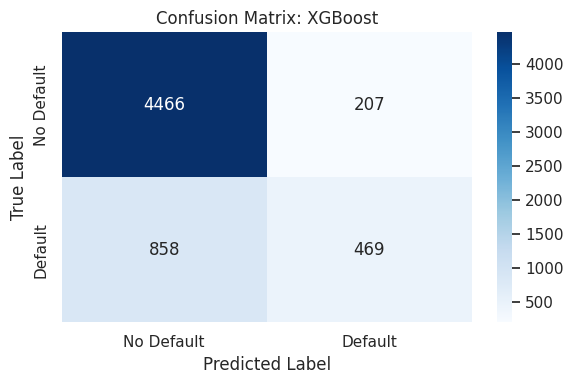

In [129]:
#Updating the model with the best parameters

best_model_xgb = XGBClassifier(class_weight='balanced',subsample= 0.8, n_estimators= 500, min_child_weight= 1, max_depth= 5, learning_rate= 0.01, gamma= 0, colsample_bytree= 0.6)
best_model_xgb.fit(X_train, y_train)

y_pred_xgbrs = best_model_xgb.predict(X_val)
y_proba_xgbrs = best_model_xgb.predict_proba(X_val)[:,1]

print("GridSearchCV XGBoost Model")
print(f"Accuracy:{(accuracy_score(y_val, y_pred_xgbrs)):.2f}")
print(f"Precision:{(precision_score(y_val, y_pred_xgbrs)):.2f}")
print(f"Recall:{(recall_score(y_val, y_pred_xgbrs)):.2f}")
print(f"F1 Score:{(f1_score(y_val, y_pred_xgbrs)):.2f}")
print(f"ROC AUC:{(roc_auc_score(y_val, y_proba_xgbrs)):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_xgbrs))
cm_xgb = confusion_matrix(y_val, y_pred_xgbrs)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix: XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

Classification Report after RandomizedSearchCV(XGBoost):

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4673
           1       0.69      0.35      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.77      0.65      0.68      6000
weighted avg       0.81      0.82      0.80      6000



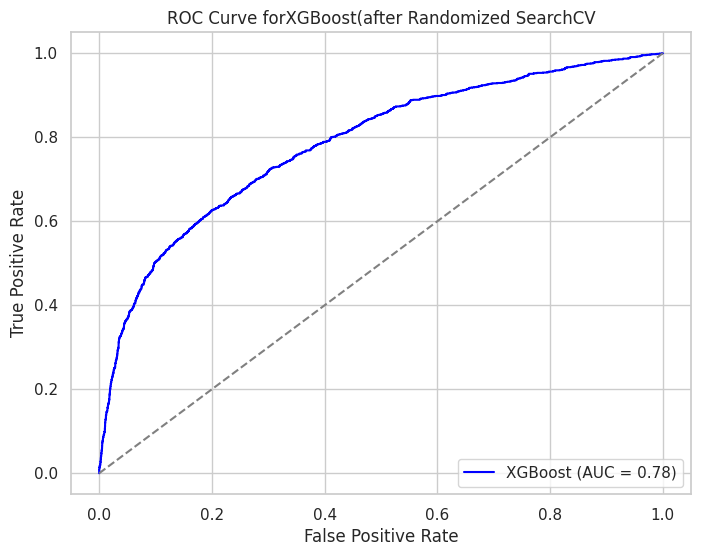

In [130]:
print("Classification Report after RandomizedSearchCV(XGBoost):\n")
print(classification_report(y_val, y_pred_xgbrs))

roc_auc_xgb = roc_auc_score(y_val, y_proba_xgbrs)

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_val, y_proba_xgbrs)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve forXGBoost(after Randomized SearchCV')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Cross Validation**

In [131]:
#Cross Validation

scores_xgb = cross_val_score(best_model_xgb, X_train ,y_train, cv=5, scoring='f1')
print("\n")
print("Cross-validated F1 scores:", scores_xgb)
print("Mean F1:", scores_xgb.mean())



Cross-validated F1 scores: [0.48415922 0.48145095 0.46983105 0.45699831 0.46025105]
Mean F1: 0.4705381163590383


**Best Threshold**

In [132]:
#Best Threshold

#Find the best threshold to improve accuracy


prec_xgb, rec_xgb, thresholds_xgb = precision_recall_curve(y_val, y_proba_xgbrs)
f1_scores_xgb = 2 * (prec_xgb * rec_xgb) / (prec_xgb + rec_xgb)
best_thresh_xgb = thresholds_xgb[f1_scores_rfc.argmax()]
print("\n")
print("Best Threshold Value",best_thresh_xgb)

#Apply the best thresold and recalculate the metrics

y_pred_opt_xgbrs = (y_proba_xgbrs >= best_thresh_xgb).astype(int)

print("Optimized Threshold XGBClassifier Model")
print(f"Accuracy:{(accuracy_score(y_val, y_pred_opt_xgbrs)):.2f}")
print(f"Precision:{(precision_score(y_val, y_pred_opt_xgbrs)):.2f}")
print(f"Recall:{(recall_score(y_val, y_pred_opt_xgbrs)):.2f}")
print(f"F1 Score:{(f1_score(y_val, y_pred_opt_xgbrs)):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_opt_xgbrs))



Best Threshold Value 0.2799016
Optimized Threshold XGBClassifier Model
Accuracy:0.80
Precision:0.54
Recall:0.55
F1 Score:0.54
Confusion Matrix:
 [[4045  628]
 [ 598  729]]


**XGBOOST Model Summary:**

The baseline XGBOOST model achieved 0.82 accuracy with F1 score of 0.47 showing moderate performance on the minority class.After Randomized searchCV, accuracy remains the same (0.82) but recall decreased to 0.35 and F1 score remain the same.Threshold optimization increased the F1 score(0.54) and recall(0.55) value.Cross validation with a mean value of 0.47 indicates moderate performance.

From the above, we can choose optimized threshold XGBOOST model since it has best F1 score and stronger recall.

# 4.SVC

In [133]:
#SVC

svc_model = SVC(kernel ='rbf',class_weight='balanced',probability=True,C=1.0,random_state=42)
svc_model.fit(X_train,y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

In [134]:
#Evaluation Metrics

y_pred_svc = svc_model.predict(X_val)
y_proba_svc = svc_model.predict_proba(X_val)[:, 1]

print("Classification Report:\n")
print(classification_report(y_val, y_pred_svc))
print("ROC AUC Score:", roc_auc_score(y_val, y_proba_svc))

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4673
           1       0.50      0.58      0.54      1327

    accuracy                           0.78      6000
   macro avg       0.69      0.71      0.70      6000
weighted avg       0.79      0.78      0.78      6000

ROC AUC Score: 0.7660094522381699


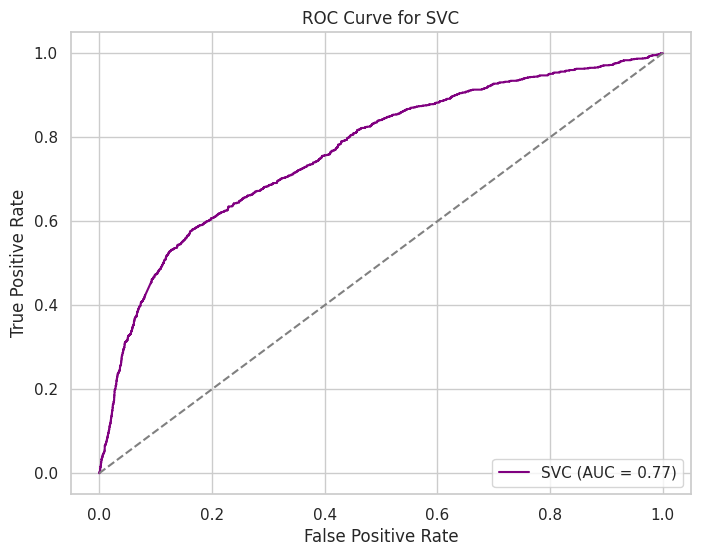

In [135]:
#Plot ROC Curve

fpr_svc, tpr_svc, _ = roc_curve(y_val, y_proba_svc)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, label='SVC (AUC = {:.2f})'.format(roc_auc_score(y_val, y_proba_svc)), color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [136]:
#Evaluation Metric:

print("SVC")
print(f"Accuracy:{(accuracy_score(y_val, y_pred_svc)):.2f}")
print(f"Precision:{(precision_score(y_val, y_pred_svc)):.2f}")
print(f"Recall:{(recall_score(y_val, y_pred_svc)):.2f}")
print(f"F1 Score:{(f1_score(y_val, y_pred_svc)):.2f}")
print(f"ROC AUC:{(roc_auc_score(y_val, y_proba_svc)):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_svc))

SVC
Accuracy:0.78
Precision:0.50
Recall:0.58
F1 Score:0.54
ROC AUC:0.77
Confusion Matrix:
 [[3908  765]
 [ 561  766]]


**#Hyperparameter Tuning**

In [137]:
#Hyperparameter Tuning SVC

param_grid = { 'C': [0.1, 1],
              #'kernel': ['linear', 'rbf'],
              'gamma': [0.01, 0.1] }
svc_grid_search = GridSearchCV(SVC(probability=True),
                               param_grid,
                               cv=5,
                               scoring='accuracy')
svc_grid_search.fit(X_train, y_train)
print("Best parameters:", svc_grid_search.best_params_)

Best parameters: {'C': 1, 'gamma': 0.1}


GridSearchCV SVC Model
Accuracy:0.78
Precision:0.50
Recall:0.55
F1 Score:0.52
ROC AUC:0.76
Confusion Matrix:
 [[3925  748]
 [ 592  735]]


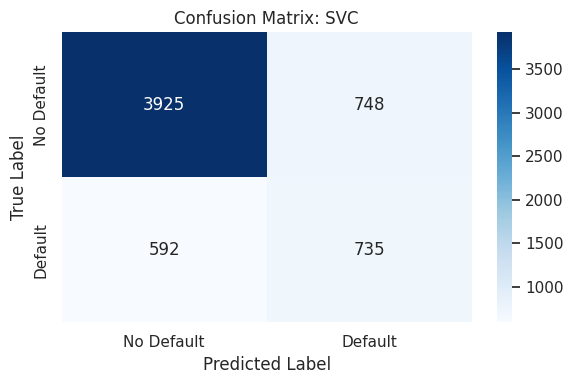

In [138]:
#Implementing the best parameters in the SVC model

best_model_svc = SVC(C= 1, gamma= 0.01,probability=True,class_weight='balanced')
best_model_svc.fit(X_train, y_train)

y_pred_svcgs = best_model_svc.predict(X_val)
y_proba_svcgs = best_model_svc.predict_proba(X_val)[:,1]

print("GridSearchCV SVC Model")
print(f"Accuracy:{(accuracy_score(y_val, y_pred_svcgs)):.2f}")
print(f"Precision:{(precision_score(y_val, y_pred_svcgs)):.2f}")
print(f"Recall:{(recall_score(y_val, y_pred_svcgs)):.2f}")
print(f"F1 Score:{(f1_score(y_val, y_pred_svcgs)):.2f}")
print(f"ROC AUC:{(roc_auc_score(y_val, y_proba_svcgs)):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_svcgs))
cm_svc = confusion_matrix(y_val, y_pred_svcgs)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix: SVC')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

Classification Report after RandomizedSearchCV(SVC):

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4673
           1       0.50      0.55      0.52      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.78      0.78      6000



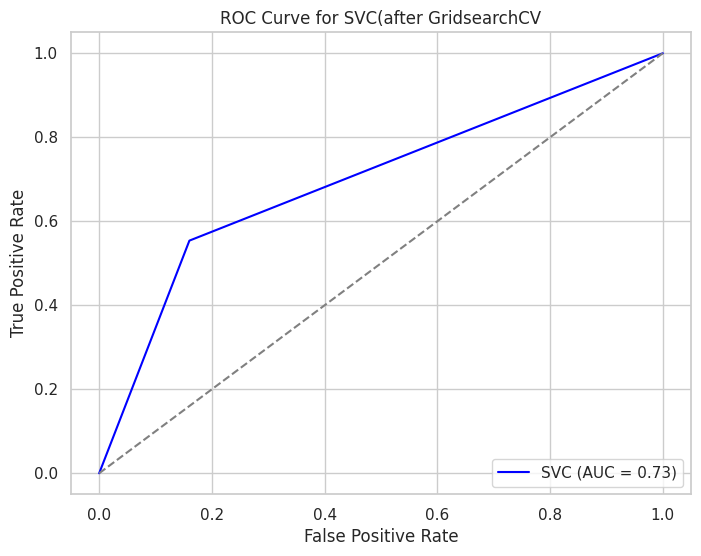

In [139]:
#Classification Report & ROC Curve for optimized model

print("Classification Report after RandomizedSearchCV(SVC):\n")
print(classification_report(y_val, y_pred_svcgs))

roc_auc_svc = roc_auc_score(y_val, y_pred_svcgs)

fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_val, y_pred_svcgs)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC(after GridsearchCV')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Best Threshod**

In [140]:
#Best Threshold

#Find the best threshold to improve accuracy

prec_svc, rec_svc, thresholds_svc = precision_recall_curve(y_val, y_proba_svcgs)
f1_scores_svc = 2 * (prec_svc * rec_svc) / (prec_svc + rec_svc)
best_thresh_svc = thresholds[f1_scores_svc.argmax()]
print("\n")
print("Best Threshold Value",best_thresh_svc)

#Apply the best thresold and recalculate the metrics

y_pred_opt_svc = (y_proba_svcgs >= best_thresh_svc).astype(int)

print("Optimized Threshold SVC Model")
print(f"Accuracy:{(accuracy_score(y_val, y_pred_opt_svc)):.2f}")
print(f"Precision:{(precision_score(y_val, y_pred_opt_svc)):.2f}")
print(f"Recall:{(recall_score(y_val, y_pred_opt_svc)):.2f}")
print(f"F1 Score:{(f1_score(y_val, y_pred_opt_svc)):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_opt_svc))



Best Threshold Value 0.5683945102249383
Optimized Threshold SVC Model
Accuracy:0.81
Precision:0.69
Recall:0.23
F1 Score:0.35
Confusion Matrix:
 [[4533  140]
 [1020  307]]


# Cross Validation:

In [141]:
#Cross Validation

scores_svc = cross_val_score(best_model_svc, X_train, y_train, cv=5, scoring='f1')
print("\n")
print("Cross-validated F1 scores:", scores_svc)
print("Mean F1:", scores_svc.mean())



Cross-validated F1 scores: [0.5183908  0.55693215 0.5456621  0.54130053 0.50851439]
Mean F1: 0.5341599944128815


SVC Summary:

The baseline SVC model achieved 78% accuracy with F1 score of 0.54 , good recall for the minority class (0.58).After RandomizedSearchCV, accuracy remained at 0.78 with a drop in recall (0.55) and F1(0.52).Cross validation with 0.53 means SVC generalizes across folds.

Best Model: SVC Baseline with a good Recall and F1

# Model Performance Summary

In [142]:
#Summary of all the 4 models(Baseline Only)

results = {}
resultsht={}
results_opt={}
cv_results={}

models = {
    'Logistic Regression': (y_val, y_pred, y_proba),
    'Random Forest': (y_val, y_pred_rf, y_proba_rf),
    'XGBoost': (y_val, y_pred_xgb, y_proba_xgb),
    'SVC': (y_val, y_pred_svc, y_proba_svc)
}


models_ht = {
    'Logistic Regression(after HT)': (y_val,y_pred_gscv,y_proba_gscv),
    'Random Forest(after HT)': (y_val, y_pred_rfcgs,y_proba_rfcgs),
    'XGBoost (after HT)': (y_val, y_pred_xgbrs,y_proba_xgbrs),
    'SVC (after HT)': (y_val,y_pred_svcgs,y_proba_svcgs)
}

models_optimizedthreshold = {
    'Logistic Regression(Optimized Threshold)': (y_val,y_pred_opt,y_proba_gscv),
    'Random Forest(Optimized Threshold)': (y_val, y_pred_opt_rfcgs,y_proba_rfcgs),
    'XGBoost (Optimized Threshold)': (y_val, y_pred_opt_xgbrs,y_proba_xgbrs),
    'SVC (Optimized Threshold)': (y_val,y_pred_opt_svc,y_proba_svcgs)
}

for name, (y_true, y_pred, y_proba) in models.items():
    results[name] = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_proba)
    }

for name_ht, (y_true_ht, y_pred_ht, y_proba_ht) in models_ht.items():
    resultsht[name_ht] = {
        'Accuracy': accuracy_score(y_true_ht, y_pred_ht),
        'Precision': precision_score(y_true_ht, y_pred_ht),
        'Recall': recall_score(y_true_ht, y_pred_ht),
        'F1 Score': f1_score(y_true_ht, y_pred_ht),
        'ROC AUC': roc_auc_score(y_true_ht, y_proba_ht)
    }

for name_opt, (y_true_opt, y_pred_opt_m, y_proba_opt) in models_optimizedthreshold.items():
    results_opt[name_opt] = {
        'Accuracy': accuracy_score(y_true_opt, y_pred_opt_m),
        'Precision': precision_score(y_true_opt, y_pred_opt_m),
        'Recall': recall_score(y_true_opt, y_pred_opt_m),
        'F1 Score': f1_score(y_true_opt, y_pred_opt_m),
        'ROC AUC': roc_auc_score(y_true_opt, y_proba_opt)
    }

summary_df = pd.DataFrame(results).T
summary_df = summary_df.round(3)
print("Model Performance Summary:\n")
print(summary_df)

summary_df_ht = pd.DataFrame(resultsht).T
summary_df_ht = summary_df_ht.round(3)
print("Hypertuned Model Performance Summary:\n")
print(summary_df_ht)

summary_df_opt = pd.DataFrame(results_opt).T.round(3)
print("Optimized Threshold Model Performance Summary:\n")
print(summary_df_opt)

cv_results = {
    'Logistic Regression': scores.mean(),
    'Random Forest Classifier':scores_rfc.mean(),
    'XGBoost':scores_xgb.mean(),
    'SVC':scores_svc.mean()
}

cv_df = pd.DataFrame.from_dict(cv_results,orient='index',columns=['Mean CV F1']).round(3)
print("\nValidation Summary:\n")
print(cv_df)

Model Performance Summary:

                     Accuracy  Precision  Recall  F1 Score  ROC AUC
Logistic Regression     0.724      0.413   0.587     0.485    0.725
Random Forest           0.814      0.656   0.335     0.444    0.773
XGBoost                 0.822      0.689   0.359     0.472    0.781
SVC                     0.779      0.500   0.577     0.536    0.766
Hypertuned Model Performance Summary:

                               Accuracy  Precision  Recall  F1 Score  ROC AUC
Logistic Regression(after HT)     0.723      0.412   0.586     0.484    0.725
Random Forest(after HT)           0.794      0.534   0.552     0.543    0.777
XGBoost (after HT)                0.822      0.694   0.353     0.468    0.784
SVC (after HT)                    0.777      0.496   0.554     0.523    0.759
Optimized Threshold Model Performance Summary:

                                          Accuracy  Precision  Recall  \
Logistic Regression(Optimized Threshold)     0.788      0.523   0.488   
Random Fo

**Final Model Selection Summary:**

Model Evaluation was done across 4 classification algorithms - Logistic Regression,Random Forest Classifier,XGBOOST ans SVC.

**Baseline and HyperTuned Models:**

1)Logistic Regression and SVC showed strong Recall but moderate precision.
Random Forest and XGB have higher accuracy and ROC-AUC but recall is very low.

2)After Hyperparameter Tuning, Random Forest improved and has highest F1 score.

**Optimized Threshold Performance:**

This is done to maximize the F1 score which is an important metric for imbalance classification.

Random Forest (Optimized Threshold) achieved 0.544 (F1 Score),highest recall (0.550),high ROC AUC (0.777)

Though XGBOOST optimized threshold model was very close,Random Forest performed better.

**Cross Validation:**

Cross Validation scores(Mean) revealed that Logistic Regression is better. But Logistic Regressiob lacked all the key metrics.Random Forest(0.536) shows better generalization than XGBOOST.

So , I would recommend **Random Forest (Optimized Threshold Model)** gives the strong overall performance on the dataset. It has highest  F1,Recall and strong precision.Better cross validation stability than XGBOOST.

So, Optimized Threshold Random Forest Model is applied to the test set and the metrics are calculated.

**Implementing the best model on the test set:**
Optimized Threshold Random Forest


Optimized Threshold Random Forest TestSet
Accuracy:0.80
Precision:0.54
Recall:0.55
F1 Score:0.54
ROC AUC:0.77
Confusion Matrix:
 [[4042  631]
 [ 597  730]]


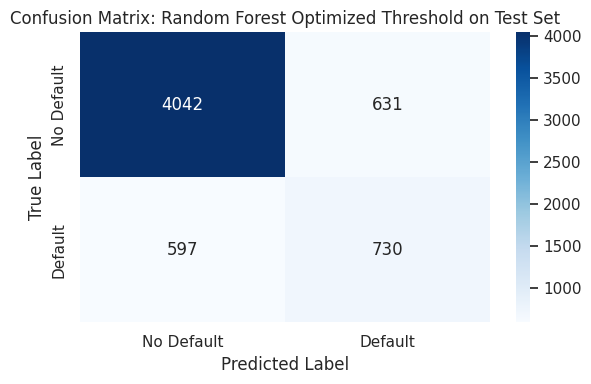

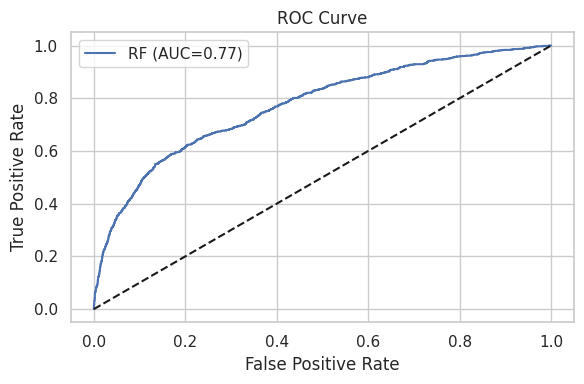

In [143]:
y_proba_rfc_test = best_model_rfc.predict_proba(X_test)[:,1]

y_pred_rfc_test = (y_proba_rfc_test >= best_thresh_rfc).astype(int)

print("\nOptimized Threshold Random Forest TestSet")
print(f"Accuracy:{(accuracy_score(y_test, y_pred_rfc_test)):.2f}")
print(f"Precision:{(precision_score(y_test, y_pred_rfc_test)):.2f}")
print(f"Recall:{(recall_score(y_test, y_pred_rfc_test)):.2f}")
print(f"F1 Score:{(f1_score(y_test, y_pred_rfc_test)):.2f}")
print(f"ROC AUC:{(roc_auc_score(y_test, y_proba_rfc_test)):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rfc_test))

cm_test = confusion_matrix(y_test, y_pred_rfc_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix: Random Forest Optimized Threshold on Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#ROC Curve

fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_rfc_test)

plt.figure(figsize=(6,4))
plt.plot(fpr_test, tpr_test, label=f'RF (AUC={roc_auc_score(y_test,y_proba_rfc_test):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.show()

**Analysis:**

After implementing the optimized threshold Random Forest Model on the test dataset,I got accuracy of 0.80

F1 Score(0.54) and Recall(0.55) is good . Got the almost same value as we got on validation set.This can furthur be improved and I have included them below undet the conclusion section.ROC AUC is also considerably good (0.77)

By looking at the confusion matrix, we can see that the model generalizes well .The model correctly identified 3976 customers as non- defaulters and there 697 false positives .(They actually paid but are identified as defaulters)There are 584 missed defaulters. This will be very costlly for and most expensive type of error if missed.

In [144]:
#Print the predictions on the test set

results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rfc_test,
    'Probability of Default': y_proba_rfc_test
})

print("Final Predictions on Test Set:")
print(results_df.head(5))
correct_count = (y_test == y_pred_rfc_test).sum()
print(f"Number of correct predictions: {correct_count}")
total_samples = len(y_test)
print(y_test)

Final Predictions on Test Set:
       Actual  Predicted  Probability of Default
6907        0          0                0.300468
24575       0          0                0.246857
26766       0          0                0.399652
2156        1          0                0.309930
3179        0          0                0.110420
Number of correct predictions: 4772
6907     0
24575    0
26766    0
2156     1
3179     0
        ..
8836     0
1259     0
27309    0
29583    0
24399    0
Name: default.payment.next.month, Length: 6000, dtype: int64


Out of 6000 samples in the testset, we can see that 4772 samples have been predicted accurately.

# Conclusion:

**Highlights/Key Learnings and Ways to Improve:**

**KeyLearnings:**

1)Threshold Optimization is essential for imbalanced datasets.Optimizing threshold(0.5) for Randome Forest and XGBOOST significantly improve their recall and F1 scores.

2)Other Matrics like F1 Score,Recall , Precision,ROC AUC should be taken for imbalance data sets other than accuracy.

3)Cross Validation reveals true model satbility.
Though Logistic Regression has the highest CV (0.7) it lacked in the other metrics.
XGBOOST has the lowest CV score 0.4 showing it is more sensitive to data splits.
Random Forest showed strong performance.

4)Ensemble models like XGBOOST and Random Forest showed better performance than the other 2 models.

5)Confusion Matrix
Importance should be given to False positives and False negatives for this imbalanced dataset than accuracy.

**Highlights:**

1)EDA has been done on the data set and found that the class is imbalanced.So, SMOTE and class weight='balanced' techniques were used.

2)Data preprocessing and scaling were done on the numerical and categorical columns.

3)Evaluated models across Baseline,Hyperparameter Tuning , Optimized threshold and Cross Validation.

4)Best Overall Model: Random Forest(Optimized Threshold)
Random Forest(Optimized Threshold)           0.796(accuracy),0.538(precision),  0.550(recall),0.544 (F1 SCORE) and ROC AUC (0.777)

5)Random Forest Classifier(Optimized Threshold) was applied on the test set and the below metric were calculated.

Optimized Threshold Random Forest TestSet
Accuracy:0.80
Precision:0.54
Recall:0.55
F1 Score:0.54
ROC AUC:0.77
Confusion Matrix:
 [[4042  631]
 [ 597  730]]

6)Out of 6000 samples in the testset, we can see that 4772 samples have been predicted accurately.

**Ways to Improve:**

1)Feature Engineering - Model performance can be improved by adding more features,domain specific variables

2)Advanced Ensemble methods like LightBOOST and also other models like knn can be implemented.

3)Have to address False negatives since this is very expensive.This can be done using cost sensitive learning.

4)For improving code usability,Pipeline models can be used.

# References

*   https://seaborn.pydata.org/generated/seaborn.kdeplot.html

*   https://www.geeksforgeeks.org/python/detecting-multicollinearity-with-vif-python/

*  https://www.geeksforgeeks.org/maths/chi-square-test/

*   https://github.com/HillidatulIlmi/EDA-and-Machine-Learning-Default-of-Credit-Card-Clients/blob/main/EDA_and_Machine_Learning_Default_of_Credit_Card_Clients.ipynb